In [1]:
# Setting up a custom stylesheet in IJulia
file = open("./../style.css") # A .css file in the same folder as this notebook file
style = read(file, String) # Read the file
HTML("$style") # Output as HTML

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.2em;\r\n    line-height: 100%;\r\n    color: rgb(0, 80, 120);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 1.9em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.CodeMirror{\r\n        font-family: \"PT Mono\";\r\n        font-size: 100%;\r\n}\r\n\r\n</style>\r\n\r\n")

## In this notebook

- [Introduction](#Introduction)
- [Multiple Dispatch](#Multiple-Dispatch)
- [Composite Types vs Dictionaries and Named Tuples](#Composite-Types-vs-Dictionaries-and-Named-Tuples)
- [Example](#Example)

## Introduction

In Julia is a new methods feature to call the same function by different type of arguments. In julia macro @which reveals the list of available methods for a function:


In [2]:
@which 2+2

+(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87

In [3]:
@which 2.0+2

+(x::Number, y::Number) in Base at promotion.jl:379

In [4]:
@which 2.0+2.0

+(x::Float64, y::Float64) in Base at float.jl:399

The process to select which method is used is called dispatching. The process that Julia uses to decide which method to call is a magical process called *Multiple dispatch*. The engine is the "Type inference Engine" that works behind the scenes as we press enter. When Julia select the methods is almost not loss computational efficiency, that is one of the performance secrets.

In [5]:
function testmethods(x,y)
    println("$x plus $y is $(x+y)")
end

print(testmethods(1.0,pi))
print(testmethods(1.0,2))
print(testmethods(1,2))


1.0 plus π is 4.141592653589793
nothing1.0 plus 2 is 3.0
nothing1 plus 2 is 3
nothing

## Multiple Dispatch


Clearly is a different behaviour in the output, hence the executed code is obviously different, so if we want we can select types for defining branching a function

In [6]:
function testmethods(x::Integer, y::Integer)
     println("$x plus $y is $(x+y) ")
end
function testmethods(x::Float64, y::Float64)
     println("$x plus $y is $(x+y)")
end
function testmethods(x::String, y::String)
     println("$x concatenated with $y is $(x*y)")
end

testmethods (generic function with 4 methods)

In [7]:
# Let's call them
# Integers
println(testmethods(1,2))
# Floats
println(testmethods(2.0,pi))
# Strings
println(testmethods("A","B"))

1 plus 2 is 3 
nothing
2.0 plus π is 5.141592653589793
nothing
A concatenated with B is AB
nothing


## Types


In Julia are many types of variables depending on the level of it we can select how specific we want to be when we program a function. This way to organize different types makes Julia very special and also suitable for different abstract functions. For example, `Integer` is an abstract type class which contains the primitive types `Int32` and `Int64`. Here is the general tree Types of the Julia core:

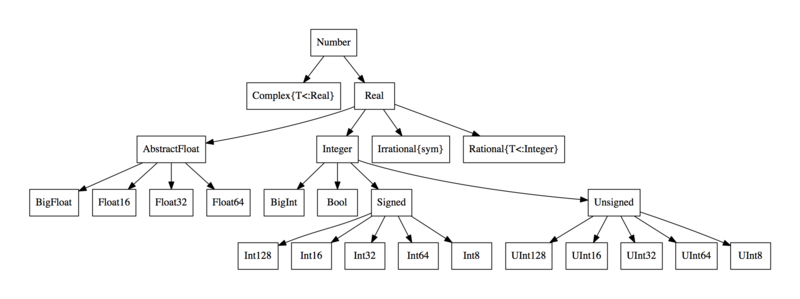

If we don't set up any different methods for our function then Julia will do that for us, however if our application requires specific types or if we want to program efficient programs then defining types is a must.

In Julia are three different type of types, (Abstract, Primitive or Composite types). Composite types are user-defined types which are necessary when users want to use their own types. A Composite types is a collection of name fields that can contain a value. In Julia CompositeTypes are created using structs and camelCase writing style (as it is used in built-in types), let's define MyType

In [8]:
# Create a CompositeType MyType with fields x y and z
struct MyType 
    x
    y::Integer
    z::Float64
end
# The type of a varaiable is asked using `typeof()` function
typeof(MyType)

DataType

In [9]:
#We can now define a variable using our type by the constructor operator. 
#This is very simillar than dictionaries but instead of using Dict constructur we use MyType:
my_type_variable = MyType("mauri", 1, pi)

MyType("mauri", 1, 3.141592653589793)

#### `new`constructor method:

There is also another way to instantiate the struct or construct the object, using an internal constructor function when declaring the struct using the `new` keyword, also this allows us to check specific range of attributes like in a MyTime composite struct:

In [28]:
struct MyTime
    # define attributes
    hour::Integer
    minute::Integer
    second::Integer
    
    # declare constructor
    function MyTime(hour::Integer = 0, minute::Integer = 0, second::Integer = 0)
       !(0 ≤ minute ≤ 60) && throw(ArgumentError("minutes must be in [0, 60] range"))
       !(0 ≤ second ≤ 60) && throw(ArgumentError("minutes must be in [0, 60] range"))
        # constructor
        new(hour, minute, second)
    end
end

# Now we can construct the struct via the following methods
mytime1 = MyTime()
mytime2 = MyTime(49)



49:00:00

But what had happend before we define an internal constructor? A default constructor is used, then if an internal constructor is defined is no longer available. In addition, there is another possibility to define new constructors that allows us to define recursive data structures, i.e when a Stract contains itself as an attribute (in this case the struct has to be mutable because it is modified after it's installation. 

In [8]:
    function MyTime(hour::Integer = 0, minute::Integer = 0, second::Integer = 0)
       !(0 ≤ minute ≤ 60) && throw(ArgumentError("minutes must be in [0, 60] range"))
       !(0 ≤ second ≤ 60) && throw(ArgumentError("minutes must be in [0, 60] range"))
        # constructor
        time = new()
        time.hour = hour
        time.minute = minute
        time.second = second
        return time
    end

MyTime

#### `show`print method:

There is also another `show` keyword to use that is used to print specific attrbitues of an object, like this (we use the `Base` to add the method into the Julia Base pkg and then we can use it simple):

In [17]:
using Printf
function Base.show(io::IO, time = MyTime) 
    @printf(io, "%02d:%02d:%02d", time.hour, time.minute, time.second)
end
print(mytime2) # or just 
mytime2

49:00:00

49:00:00

In [47]:
# Lets define some functions to operate with times 
# transform time to an integer base 60 
function timetoint(time::MyTime)
    minutes = time.hour * 60 + time.minute
    seconds = minutes*60 + time.second 
    return seconds
end
# do the oposite
function inttotime(timeint::Integer)
    (minutes, seconds) = divrem(timeint, 60)
    (hours, minutes) = divrem(minutes, 60)
    return MyTime(hours, minutes, seconds)
end
# increment time 
function increment(seconds::Integer, time::MyTime)
    return inttotime(timetoint(time) + seconds)
end

increment (generic function with 1 method)

#### Operator overloading:

Now we can define specific operators for our methods like this, for example we can add a method to the plus `+` operator to add to times of type `MyType`. This is called operator overloading: 

In [48]:
import Base.+

function +(t1::MyTime, t2::MyTime)
    sum_time_int = timetoint(t1) + timetoint(t2)
    return inttotime(sum_time_int)
end

# Now we can execute
sunset_starts = MyTime(18, 20, 20)
duration = MyTime(0, 45, 30)

# This will use + operator and show method
sunset_starts + duration

00:45:53

#### Multiple displatch with objects:
Julia can decide which method invokes obviously using and defining different objects. 

In [55]:
# We can now add one new method to the sum operator using increment function 
import Base.+

function +(seconds::Integer, time::MyTime)
    increment(seconds, time)
end

# Now we can add seconds to a time object using multiple dispatch
3600 + sunset_starts

19:20:20

[Back to the top](#In-this-lesson)

## Composite Types vs Dictionaries and Named Tuples


A natural question is that now we have different ways to allocate some different data into a variable depending on the data structure, let's make a comparison:  

In [10]:
# Defining into a dictionary
my_dict = Dict('x' => "Mauri", 'y' => 1, 'z'=> pi)
# Defining into an array
my_arraay = ["Mauri", 1, pi]
# Using a named tuple 
my_tuple = (x="Mauri", y = 1, z = pi)


(x = "Mauri", y = 1, z = π)

In [11]:
varinfo()

| name             |      size | summary                                                        |
|:---------------- | ---------:|:-------------------------------------------------------------- |
| Base             |           | Module                                                         |
| Core             |           | Module                                                         |
| Main             |           | Module                                                         |
| MyType           | 160 bytes | DataType                                                       |
| file             | 344 bytes | IOStream                                                       |
| my_arraay        |  85 bytes | 3-element Vector{Any}                                          |
| my_dict          | 413 bytes | Dict{Char, Any} with 3 entries                                 |
| my_tuple         |  29 bytes | NamedTuple{(:x, :y, :z), Tuple{String, Int64, Irrational{:π}}} |
| my_type_variable |  45 bytes | MyType                                                         |
| style            | 2.013 KiB | 2053-codeunit String                                           |
| testmethods      |   0 bytes | testmethods (generic function with 4 methods)                  |


As it is presented in the previous table *Dictionaries take more memory* and *Tuples take the least memory* and our *Composite type take less memory than our Array* a general rule then can be: **"if a Tuple it is two restrictive because they are (unmutable) for our application and we don't need all the bells and whistles of the Array then it make senses for us to set our Composite Types"**. 

In [12]:
# As in named tuples we use
my_tuple.x
# then we can acces to MyType fields using
println("The field $(fieldnames(MyType)[1]) is $(my_type_variable.x)")
println("The field $(fieldnames(MyType)[2]) is $(my_type_variable.y)")
println("The field $(fieldnames(MyType)[3]) is $(my_type_variable.z)")

The field x is mauri
The field y is 1
The field z is 3.141592653589793


In [13]:
# but simple structs are inmutable like tuples...
my_type_variable.y = 2 

LoadError: setfield!: immutable struct of type MyType cannot be changed

Then we can define a mutable struct as a class of CompositeStructs using:

mutable struct MyMutableStruct
    x
    y::Integer
    z::AbstractFloat
end

# Construct the variable
my_mutable_var = MyMutableStruct("Mauri",1,pi)
println("The previous value of field $(fieldnames(typeof(my_mutable_var))[1]) of my_mutable_var was $(my_mutable_var.x)")
# Change the field x
my_mutable_var.x = "Robert"
println("The new value of field $(fieldnames(typeof(my_mutable_var))[1]) of my_mutable_var is $(my_mutable_var.x)")


In [1]:
[Back to the top](#In-this-lesson)

LoadError: syntax: incomplete: premature end of input

## Example

From this point there are several combinations of mutable structs than we can defining, for example structs of structs. Imagine that we can split different kind of stars in groups and that each star has it's own characteristic, then we can define a general struct called `Star`:

In [15]:
# General Star tpye
struct Star 
    galaxy_location::String
    age::BigFloat
end

# Solar Stars
struct SolarStar
    id::Star
    light::AbstractFloat
    mass::BigFloat
end

# Solar Stars
struct NeutronStar
    id::Star
    power::AbstractFloat
    element::String
end


Since we have now different type of stars then we might need a different methods for function. Let's define a function with different methods depending on the type of the inputs to tell as about the star:

In [16]:
# Solar star method
function tellme_about_the_star(star::SolarStar)
    println("This Solar Star is located at glaxy $(star.id.galaxy_location) and its age is: $(star.id.age) ")
    println("This Solar Star has light: $(star.light) and mass : $(star.mass) ")
end

our_sun = SolarStar(Star("Via Lactea", BigFloat(1e12)), 3.0e12, BigFloat(12e30))

tellme_about_the_star(our_sun)

# Neutron star method
function tellme_about_the_star(star::NeutronStar)
    println("This Neutron Star is located at glaxy $(star.id.galaxy_location) and its age is: $(star.id.age) ")
    println("This Neutron Star has a power of: $(star.power) and the element : $(star.element) ")
end

some_neutron_star = NeutronStar(Star( "Magallanes", BigFloat(1e21) ), 1e8, "Oxigen" )
tellme_about_the_star(some_neutron_star)

This Solar Star is located at glaxy Via Lactea and its age is: 1.0e+12 
This Solar Star has light: 3.0e12 and mass : 1.1999999999999999112715591221248e+31 
This Neutron Star is located at glaxy Magallanes and its age is: 1.0e+21 
This Neutron Star has a power of: 1.0e8 and the element : Oxigen 


As we see we can access to composite dataTypes using multiple dots `data_type_var1.data_type_var2.field_type2` also we can use two functions to get into what is going on under the hood:

- `typeof()`: return the type of a variable
- `fieldnames()`: return the fields of a type

In [23]:
$
println("The tpye of our_sun.id  is $(typeof(our_sun.id))")
println("The tpye of our_sun.id  is $(typeof(our_sun.mass))")


The tpye of our_sun.id  is Star
The tpye of our_sun.id  is BigFloat


[Back to the top](#In-this-lesson)